# Tidy Data Mess 4 and 5

Today, we will be using the Tidy Data Mess 4 and 5 data to illustrate the method and level of detail we should practice when going through data preprocessing. The rest of the notebook shows the different steps that are appropriate for this dataset. Please review this so it may serve as a guide for your assessments. Be reminded that this notebook only contains the steps that are relevant for this dataset. It is a certainty that other data sets may require other methods of data preprocessing.

# Environment Set-Up

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [2]:
df_mess45 = pd.read_csv('mess45_edited.csv')
df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,8/5/00,8/5/00,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2/12/00,2/12/00,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,9/2/00,9/2/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,7/1/00,7/1/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Describing the dataset

## info and describe

To describe the dataset, we can still use the ___.info()___ or ___.describe()___ commands.

In [3]:
df_mess45.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             317 non-null    int64  
 1   artist.inverted  317 non-null    object 
 2   track            317 non-null    object 
 3   time             317 non-null    object 
 4   genre            317 non-null    object 
 5   date.entered     317 non-null    object 
 6   date.peaked      317 non-null    object 
 7   x1st.week        317 non-null    int64  
 8   x2nd.week        312 non-null    float64
 9   x3rd.week        307 non-null    float64
 10  x4th.week        300 non-null    float64
 11  x5th.week        292 non-null    float64
 12  x6th.week        280 non-null    float64
 13  x7th.week        269 non-null    float64
 14  x8th.week        260 non-null    float64
 15  x9th.week        253 non-null    float64
 16  x10th.week       244 non-null    float64
 17  x11th.week      

In [4]:
df_mess45.describe()

,year,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
count,317.0,317.000000,312.000000,307.000000,300.000000,292.000000,280.000000,269.000000,260.000000,253.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2000.0,79.958991,71.173077,65.045603,59.763333,56.339041,52.360714,49.219331,47.119231,46.343874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,14.686865,18.200443,20.752302,22.324619,23.780022,24.473273,25.654279,26.370782,27.136419,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2000.0,15.000000,8.000000,6.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2000.0,74.000000,63.000000,53.000000,44.750000,38.750000,33.750000,30.000000,27.000000,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2000.0,81.000000,73.000000,66.000000,61.000000,57.000000,51.500000,47.000000,45.500000,42.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.0,91.000000,84.000000,79.000000,76.000000,73.250000,72.250000,67.000000,67.000000,67.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2000.0,100.000000,100.000000,100.000000,100.000000,100.000000,99.000000,100.000000,99.000000,100.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## y-data-profiling
y-data-profiling can also be used here. The code is commented out because of the runtime. Uncomment at your desire.

In [5]:
# from ydata_profiling import ProfileReport

# df = df_mess45.copy()
# profile = ProfileReport(df, title="Profiling Report")
# profile

## Genre Check

Given that this is the only nominal attribute that should have predetermined values, we need to check the data genre attribute for any data cleaning/standardization/processing needs.

In [6]:
df_mess45['genre'].unique()

array(['Rock', 'Latin', 'Country', 'Rap', 'Pop', 'Electronica', 'Jazz',
       'R&B', 'Reggae', 'Gospel'], dtype=object)

Given the above output, genre requires no cleaning.

# Data Preprocessing

Upon reviewing the outputs, we can see the ff. for the indicated columns below:
1. artist.inverted: last names come first - For the purposes of this notebook, let's assume that we need the first names to go first for readability and familiarity
2. time: listed as an object given the comma - The length can be transformed into a more usable format specifically in seconds instead of the current format
3. date.entered and date.peaked - Date formats can be converted into something more machine-readable
4. column names - the column names for the weekly rankings contain a number of unwanted characteristics assuming that we want to use the week number only:
    - There is an "x" at the start of the name of each column
    - Any text after the number is unwanted. There are several combinations of characters.
5. table unpivot/melt - the weekly rankings can be converted into a more tabular format

Other necessary steps may reveal themselves as we go along.

## Column Name Clean-Up
- Remove "x" and the characters afterwards

In [7]:
new_col_list = []
for i in df_mess45.columns:
    if i.startswith("x"):
        i = i.lstrip("x")[:-7]
    new_col_list.append(i)

new_col_list

working_df_mess45 = df_mess45.copy()
working_df_mess45.columns = new_col_list
working_df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,9/23/00,11/18/00,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2/12/00,4/8/00,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,10/23/99,1/29/00,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,8/12/00,9/16/00,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,8/5/00,10/14/00,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,8/5/00,8/5/00,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2/12/00,2/12/00,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,9/2/00,9/2/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,7/1/00,7/1/00,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Datetime datatype conversion
- Convert date.entered and date.peaked into datetime instead of object

In [8]:
for i in ["date.entered", "date.peaked"]:
    working_df_mess45[i] = pd.to_datetime(working_df_mess45[i])

working_df_mess45.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             317 non-null    int64         
 1   artist.inverted  317 non-null    object        
 2   track            317 non-null    object        
 3   time             317 non-null    object        
 4   genre            317 non-null    object        
 5   date.entered     317 non-null    datetime64[ns]
 6   date.peaked      317 non-null    datetime64[ns]
 7   1                317 non-null    int64         
 8   2                312 non-null    float64       
 9   3                307 non-null    float64       
 10  4                300 non-null    float64       
 11  5                292 non-null    float64       
 12  6                280 non-null    float64       
 13  7                269 non-null    float64       
 14  8                260 non-null    float64  

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_24449/368733998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  working_df_mess45[i] = pd.to_datetime(working_df_mess45[i])
/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_24449/368733998.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  working_df_mess45[i] = pd.to_datetime(working_df_mess45[i])


In [9]:
working_df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Artist Name Inversion
- inverting the last name, first name format of artist.name
- assumptions:
    - only names with one comma are artist names with the last name, first name format

In [10]:
working_df_mess45['artist.inverted'].apply(lambda x : x.count(",")).value_counts()

artist.inverted
0    183
1    134
Name: count, dtype: int64

In [11]:
working_df_mess45['artist.inverted'] = working_df_mess45['artist.inverted'].apply(lambda x: x.split(",")[1].strip()+" "+x.split(",")[0].strip() if "," in x else x)
working_df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,1,2,3,...,67,68,69,70,71,72,73,74,75,76
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,98,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,2000,Will Smith,Freakin' It,3:58,Rap,2000-02-12,2000-02-12,99,99.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,99,99.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Column Melt/Unpivot
- The weekly rankings need to be melted/unpivoted to transform it in a more easily processable tabular format

In [12]:
working_df_mess45.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
       '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
       '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71',
       '72', '73', '74', '75', '76'],
      dtype='object')

In [13]:
working_df_mess45 = working_df_mess45.melt(id_vars=['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered', 'date.peaked']
                       , value_name='rank'
                       , var_name = "week"
                       , value_vars=working_df_mess45.columns[7:]
                       )

working_df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,NaN
24088,2000,Will Smith,Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,NaN
24090,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,NaN


## Dealing with the Null Rankings
Depending on the data mining objective, there can be two ways to deal with null rankings:
- fill it with a particular value
- drop the rows 

### Filling with a particular value
The best way to do this is via ___.isna()___ for identification and ___.fillna()___ for imputing a value.

In [14]:
working_df_mess45.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24092 entries, 0 to 24091
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             24092 non-null  int64         
 1   artist.inverted  24092 non-null  object        
 2   track            24092 non-null  object        
 3   time             24092 non-null  object        
 4   genre            24092 non-null  object        
 5   date.entered     24092 non-null  datetime64[ns]
 6   date.peaked      24092 non-null  datetime64[ns]
 7   week             24092 non-null  object        
 8   rank             5307 non-null   float64       
dtypes: datetime64[ns](2), float64(1), int64(1), object(5)
memory usage: 1.7+ MB


In [15]:
working_df_mess45.describe()

,year,date.entered,date.peaked,rank
count,24092.0,24092,24092,5307.000000
mean,2000.0,2000-05-03 23:14:34.447949568,2000-06-25 05:08:53.753943296,51.052384
min,2000.0,1999-06-05 00:00:00,2000-01-01 00:00:00,1.000000
25%,2000.0,2000-02-05 00:00:00,2000-03-18 00:00:00,26.000000
50%,2000.0,2000-04-29 00:00:00,2000-06-24 00:00:00,51.000000
75%,2000.0,2000-08-12 00:00:00,2000-09-23 00:00:00,76.000000
max,2000.0,2000-12-30 00:00:00,2000-12-30 00:00:00,100.000000
std,0.0,NaN,NaN,28.966198


In [16]:
working_df_mess45['rank'].isna().value_counts()

rank
True     18785
False     5307
Name: count, dtype: int64

### Dealing with NAs
- Fill NAs with 0 using ___.fillna()___ - not part of top 100.
- Convert to integer datatype - week and rank
- Drop unnecessary columns

In [17]:
working_df_mess45['rank'] = working_df_mess45['rank'].fillna(0)
working_df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,Christina Aguilera,Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,76,0.0
24088,2000,Will Smith,Freakin' It,3:58,Rap,2000-02-12,2000-02-12,76,0.0
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,76,0.0
24090,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,76,0.0


### Identify gap week possibility
It is possible that a song will be part of the top 100 for a period of time, drop out for a period of time, and then return. In this case, it is important to determine if there are gap weeks as it could affect the measures/metrics for any potential data mining objectives.

#### Actual Implementation

In [18]:
gap_week_df = pd.DataFrame()
for i in working_df_mess45['track'].unique():
    _df_artist = working_df_mess45[working_df_mess45['track']==i].copy()
    _df_artist['rank'] = _df_artist['rank'].astype(int)
    _df_artist['week'] = _df_artist['week'].astype(int)
    _max_week = int(_df_artist[_df_artist['rank']!=0]['week'].max())
    # print(_max_week)
    _df_artist['gap_week'] = _df_artist[['week', 'rank']].apply(lambda x: True if x[0]< _max_week and x[1]==0 else False, axis=1)
    _df_artist['drop_week'] = _df_artist['week'].apply(lambda x: True if x > _max_week else False)
    gap_week_df = pd.concat([gap_week_df, _df_artist])

gap_week_df

/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_24449/807674796.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  _df_artist['gap_week'] = _df_artist[['week', 'rank']].apply(lambda x: True if x[0]< _max_week and x[1]==0 else False, axis=1)
/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_24449/807674796.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  _df_artist['gap_week'] = _df_artist[['week', 'rank']].apply(lambda x: True if x[0]< _max_week and x[1]==0 else False, axis=1)
/var/folders/42/klv0xnk11nj2hh0wkk702nkh0000gn/T/ipykernel_24449/807674796.py:8: FutureWarning: Series.__getitem__ tre

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,drop_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78,False,False
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,2,63,False,False
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,3,49,False,False
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,4,33,False,False
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,5,23,False,False
...,...,...,...,...,...,...,...,...,...,...,...
22823,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,72,0,False,True
23140,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,73,0,False,True
23457,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,74,0,False,True
23774,2000,Fragma,Toca's Miracle,3:22,R&B,2000-10-28,2000-10-28,75,0,False,True


#### Checking
The cells below show the existence of gap weeks.

In [19]:
gap_week_df[gap_week_df['gap_week']==True]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,drop_week
6349,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,21,0,True,False
6666,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,22,0,True,False
6983,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,23,0,True,False
7300,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,24,0,True,False
7617,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,25,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2203,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,7,0,True,False
2520,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,8,0,True,False
2837,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,9,0,True,False
3154,2000,Anastacia,I'm Outta Love,4:01,Pop,2000-04-01,2000-04-01,10,0,True,False


In [20]:
gap_week_df[gap_week_df['track']=='Amazed'][:30]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,drop_week
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81,False,False
326,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,2,54,False,False
643,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,3,44,False,False
960,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,4,39,False,False
1277,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,5,38,False,False
1594,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,6,33,False,False
1911,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,7,29,False,False
2228,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,8,29,False,False
2545,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,9,32,False,False
2862,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,10,27,False,False


In [21]:
gap_week_df[gap_week_df['track']=='Amazed'][60:]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,drop_week
19029,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,61,42,False,False
19346,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,62,42,False,False
19663,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,63,45,False,False
19980,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,64,50,False,False
20297,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,65,0,False,True
20614,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,66,0,False,True
20931,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,67,0,False,True
21248,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,68,0,False,True
21565,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,69,0,False,True
21882,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,70,0,False,True


#### Droping Unnecessary Columns
Despite identifying gap weeks, we will drop gap weeks as well as the weeks after the last ranked week so they don't affect ranking numbers.

In [22]:
drop_df = gap_week_df[gap_week_df['drop_week']==False].drop(columns='drop_week')
drop_df = drop_df[drop_df['gap_week']==False]
drop_df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78,False
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,2,63,False
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,3,49,False
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,4,33,False
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,5,23,False
...,...,...,...,...,...,...,...,...,...,...
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,1,99,False
631,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,2,99,False
315,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,1,99,False
632,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,2,99,False


In [23]:
gap_week_df[gap_week_df['track']=="Amazed"]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,drop_week
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81,False,False
326,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,2,54,False,False
643,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,3,44,False,False
960,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,4,39,False,False
1277,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,5,38,False,False
...,...,...,...,...,...,...,...,...,...,...,...
22516,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,72,0,False,True
22833,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,73,0,False,True
23150,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,74,0,False,True
23467,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,75,0,False,True


In [24]:
drop_df[drop_df['track']=="Amazed"]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week
9,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,1,81,False
326,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,2,54,False
643,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,3,44,False
960,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,4,39,False
1277,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,5,38,False
1594,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,6,33,False
1911,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,7,29,False
2228,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,8,29,False
2545,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,9,32,False
2862,2000,Lonestar,Amazed,4:25,Country,1999-06-05,2000-03-04,10,27,False


In [25]:
drop_df[(drop_df['track']=="Amazed") & (drop_df['gap_week']==True)]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week


### Duration Conversion
Convert time from format of "mm:ss" to just seconds for easier processing

In [26]:
drop_df['total_time_s'] = drop_df['time'].apply(lambda x: int(x.split(":")[0])*60 + int(x.split(":")[1]))
drop_df

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,total_time_s
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78,False,218
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,2,63,False,218
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,3,49,False,218
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,4,33,False,218
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,5,23,False,218
...,...,...,...,...,...,...,...,...,...,...,...
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,1,99,False,210
631,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,2,99,False,210
315,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,1,99,False,238
632,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,2,99,False,238


### Additional Date Conversions
Extract additional datetime attributes from date.entered and date.peaked

In [27]:
working_df_mess45 = drop_df.copy()

In [28]:
for i in ['date.entered', 'date.peaked']:
    working_df_mess45[i+'.year'] = working_df_mess45[i].apply(lambda x: x.year)
    working_df_mess45[i+'.month'] = working_df_mess45[i].apply(lambda x: x.month)
    working_df_mess45[i+'.day'] = working_df_mess45[i].apply(lambda x: x.day)
    working_df_mess45[i+'.quarter'] = working_df_mess45[i].apply(lambda x: x.quarter)

In [29]:
working_df_mess45

,year,artist.inverted,track,time,genre,date.entered,date.peaked,week,rank,gap_week,total_time_s,date.entered.year,date.entered.month,date.entered.day,date.entered.quarter,date.peaked.year,date.peaked.month,date.peaked.day,date.peaked.quarter
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78,False,218,2000,9,23,3,2000,11,18,4
317,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,2,63,False,218,2000,9,23,3,2000,11,18,4
634,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,3,49,False,218,2000,9,23,3,2000,11,18,4
951,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,4,33,False,218,2000,9,23,3,2000,11,18,4
1268,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,5,23,False,218,2000,9,23,3,2000,11,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,1,99,False,210,2000,9,2,3,2000,9,2,3
631,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,2,99,False,210,2000,9,2,3,2000,9,2,3
315,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,1,99,False,238,2000,7,1,3,2000,7,1,3
632,2000,The Eastsidaz,Got Beef,3:58,Rap,2000-07-01,2000-07-01,2,99,False,238,2000,7,1,3,2000,7,1,3


## One-Hot Encoding
One-hot encoding is required of nominal values. In this case, only _genre_ should be transformed into the numerical format. Doing the same for artist.inverted and track is not advised given that unique nature of artist names and tracks.

___.get_dummies___ is for doing one-hot encoding on nominal values

_columns_ identifies a subset of columns to apply one-hot encoding. Otherwise, it is applied on the whole dataframe.

_drop_first_ is for removing one of the values as columns to avoid multi-collinearity which will affect model performance. You'll notice from 10 unique values, only 9 columns were generated. This is because a 0 value on all columns would indicate that this track belongs to the "missing" genre.

_dtype_ is for ensuring that the value generated get_dummies is according to what's needed. In this case, since a boolean numeric value is expected, an integer is the desired output.

In [30]:
working_df_mess45['genre'].nunique()

10

In [31]:
dummy_df = pd.get_dummies(working_df_mess45, columns=['genre'], drop_first=True, dtype=int)
dummy_df

,year,artist.inverted,track,time,date.entered,date.peaked,week,rank,gap_week,total_time_s,...,date.peaked.quarter,genre_Electronica,genre_Gospel,genre_Jazz,genre_Latin,genre_Pop,genre_R&B,genre_Rap,genre_Reggae,genre_Rock
0,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,1,78,False,218,...,4,0,0,0,0,0,0,0,0,1
317,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,2,63,False,218,...,4,0,0,0,0,0,0,0,0,1
634,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,3,49,False,218,...,4,0,0,0,0,0,0,0,0,1
951,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,4,33,False,218,...,4,0,0,0,0,0,0,0,0,1
1268,2000,Destiny's Child,Independent Women Part I,3:38,2000-09-23,2000-11-18,5,23,False,218,...,4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,2000-09-02,1,99,False,210,...,3,0,0,0,0,0,0,0,0,1
631,2000,Zombie Nation,Kernkraft 400,3:30,2000-09-02,2000-09-02,2,99,False,210,...,3,0,0,0,0,0,0,0,0,1
315,2000,The Eastsidaz,Got Beef,3:58,2000-07-01,2000-07-01,1,99,False,238,...,3,0,0,0,0,0,0,1,0,0
632,2000,The Eastsidaz,Got Beef,3:58,2000-07-01,2000-07-01,2,99,False,238,...,3,0,0,0,0,0,0,1,0,0


# Summary Statistics

Given that we no longer have NAs or 0s, we can now compute for the mean, median, and mode summary statistics for different measures/metrics.

In [32]:
working_df_mess45.groupby(['artist.inverted', 'track', 'genre'])['rank'].mean().sort_values(ascending=False)

artist.inverted              track                     genre
Zombie Nation                Kernkraft 400             Rock     99.000000
Fragma                       Toca's Miracle            R&B      99.000000
Will Smith                   Freakin' It               Rap      99.000000
The Eastsidaz                Got Beef                  Rap      99.000000
LL Cool J                    Imagine That              Rap      98.500000
                                                                  ...    
Destiny's Child              Independent Women Part I  Rock     14.821429
Missy "Misdemeanor" Elliott  Hot Boyz                  Rap      14.333333
N'Sync                       Bye Bye Bye               Rock     14.260870
Madonna                      Music                     Rock     13.458333
Santana                      Maria, Maria              Rock     10.500000
Name: rank, Length: 317, dtype: float64

In [33]:
working_df_mess45.groupby(['artist.inverted', 'track', 'genre'])['rank'].median().sort_values(ascending=False)

artist.inverted  track                     genre
Zombie Nation    Kernkraft 400             Rock     99.0
Will Smith       Freakin' It               Rap      99.0
Lil' Mo          Ta Da                     Rap      99.0
The Eastsidaz    Got Beef                  Rap      99.0
Fragma           Toca's Miracle            R&B      99.0
                                                    ... 
N'Sync           Bye Bye Bye               Rock      9.0
Whitney Houston  My Love Is Your Love      Rock      8.5
Savage Garden    I Knew I Loved You        Rock      8.0
Destiny's Child  Independent Women Part I  Rock      6.0
Santana          Maria, Maria              Rock      2.5
Name: rank, Length: 317, dtype: float64

In [34]:
working_df_mess45.groupby(['artist.inverted', 'track', 'genre'])['rank'].count().sort_values(ascending=False)

artist.inverted   track                  genre  
Creed             Higher                 Rock       57
Lonestar          Amazed                 Country    55
3 Doors Down      Kryptonite             Rock       53
Faith Hill        Breathe                Rap        53
Creed             With Arms Wide Open    Rock       47
                                                    ..
LL Cool J         Imagine That           Rap         2
Ghostface Killah  Cherchez LaGhost       R&B         1
Master P          Souljas                Rap         1
Fragma            Toca's Miracle         R&B         1
Gloria Estefan    No Me Dejes De Querer  Rock        1
Name: rank, Length: 317, dtype: int64

## Skewed Data
Let's pick the top genre in terms of weekly ranking counts and see if the rankings for that genre are skewed in any way

In [35]:
working_df_mess45['genre'].value_counts()

genre
Rock           2587
Country        1200
Rap             838
R&B             261
Latin           173
Pop             137
Electronica      72
Gospel           20
Reggae           15
Jazz              5
Name: count, dtype: int64

In [36]:
working_df_mess45[working_df_mess45['genre']=="Rock"].groupby('genre')['rank'].value_counts().sort_values(ascending=False)

genre  rank
Rock   1       50
       6       46
       4       44
       5       44
       2       43
               ..
       80      14
       92      14
       53      13
       99      13
       54      11
Name: count, Length: 100, dtype: int64

In [37]:
print(f"Mean: {working_df_mess45[working_df_mess45['genre']=="Rock"]['rank'].mean()}")
print(f"Median: {working_df_mess45[working_df_mess45['genre']=="Rock"]['rank'].median()}")
print(f"Mode: {working_df_mess45[working_df_mess45['genre']=="Rock"]['rank'].value_counts().sort_values(ascending=False).index[0]}")

Mean: 42.20680324700425
Median: 36.0
Mode: 1


Given that the above values can be arranged in mode-median-mean in ascending order, it can be said that the Rock genre rankings are positively skewed given the data we have.

## Visualizations

### Boxplot - Rank by Genre

In [38]:
working_df_mess45[['genre', 'rank']].groupby('genre')['rank'].min().sort_values(ascending=False).index.to_list()

['Gospel',
 'Reggae',
 'R&B',
 'Jazz',
 'Electronica',
 'Pop',
 'Country',
 'Latin',
 'Rock',
 'Rap']

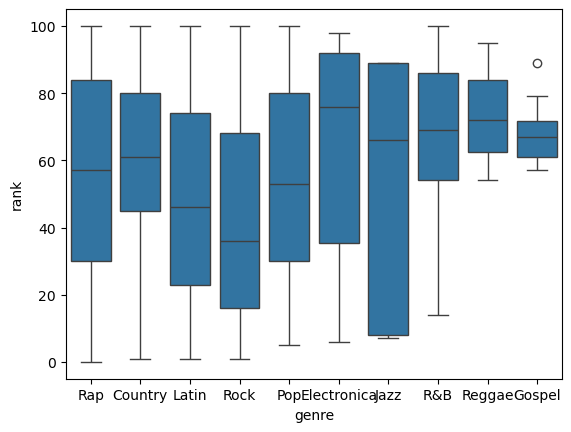

In [39]:
sns.boxplot(working_df_mess45[['genre', 'rank']], x='genre', y='rank', order=working_df_mess45[['genre', 'rank']].groupby('genre')['rank'].min().sort_values(ascending=True).index.to_list())
plt.show()


### Histogram - Rock Rank

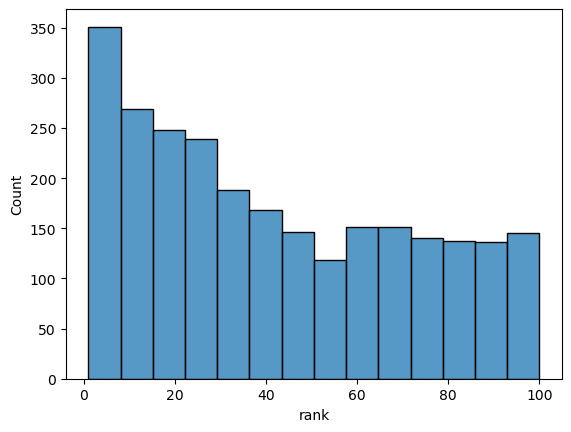

In [40]:
sns.histplot(working_df_mess45[working_df_mess45['genre']=='Rock']['rank'])
plt.show()

### Scatterplot - Rock Rank x total_time_s and date.entered.month

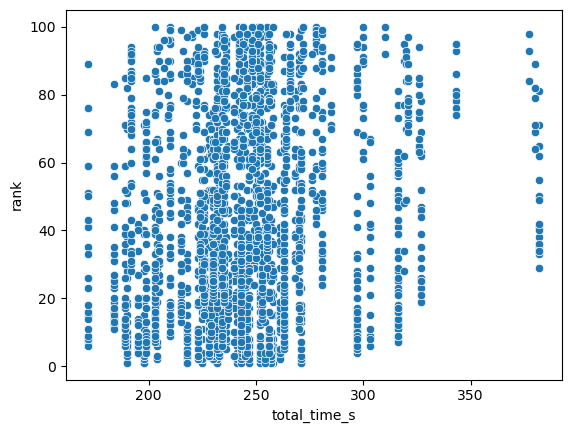

In [41]:
sns.scatterplot(working_df_mess45[working_df_mess45['genre']=='Rock'][['total_time_s', 'rank']], x='total_time_s', y='rank')
plt.show()

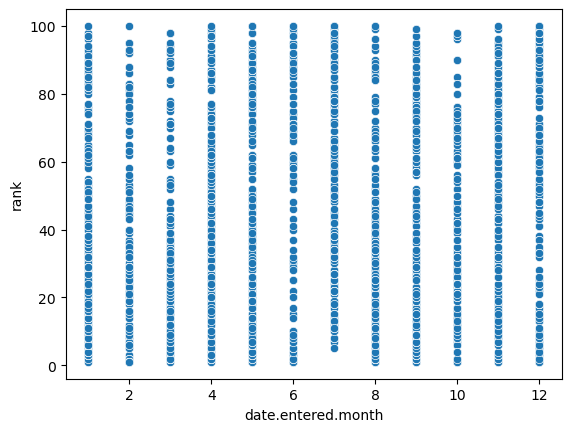

In [42]:
sns.scatterplot(working_df_mess45[working_df_mess45['genre']=='Rock'][['date.entered.month', 'rank']], x='date.entered.month', y='rank')
plt.show()

# Correlation
___.corr()___ computes for the correlation scores for each attribute. This necessitates dropping non-numeric attributes.

Notable correlation scores can be further investigated, but this also depends on the nature of the attributes. For example, month and quarter attributes despite their correlation score need not be investigated given that we know a higher month number also has a higher quarter number.

## Seaborn Heatmap

In [43]:
working_df_mess45.columns

Index(['year', 'artist.inverted', 'track', 'time', 'genre', 'date.entered',
       'date.peaked', 'week', 'rank', 'gap_week', 'total_time_s',
       'date.entered.year', 'date.entered.month', 'date.entered.day',
       'date.entered.quarter', 'date.peaked.year', 'date.peaked.month',
       'date.peaked.day', 'date.peaked.quarter'],
      dtype='object')

In [44]:
corr_df = working_df_mess45.drop(columns=['year', 'artist.inverted', 'track', 'time','genre','date.entered','date.peaked', 'gap_week']).corr()
corr_df = corr_df.round(2)

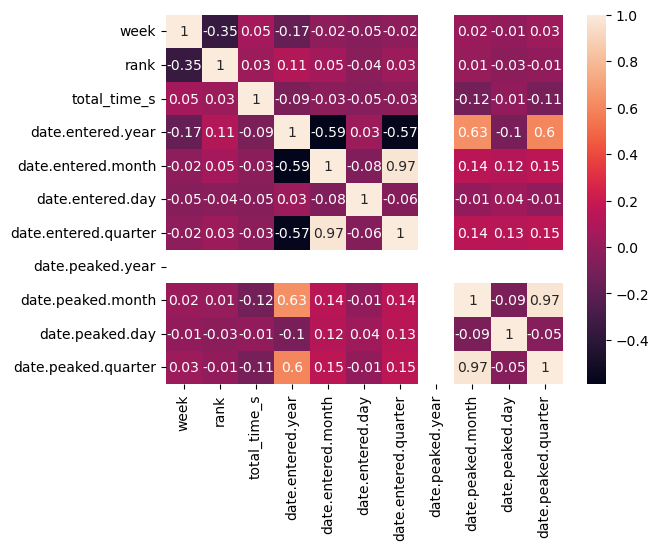

In [45]:
sns.heatmap(corr_df, annot=True)
plt.show()

## Pairwise View via Seaborn Pairplot
This plot allows you to look closer into the values per combination of attributes which will allow you to investigate on specific attribute pairings further. However, as you can see below, it can get unwieldy when there is a large number of attributes.

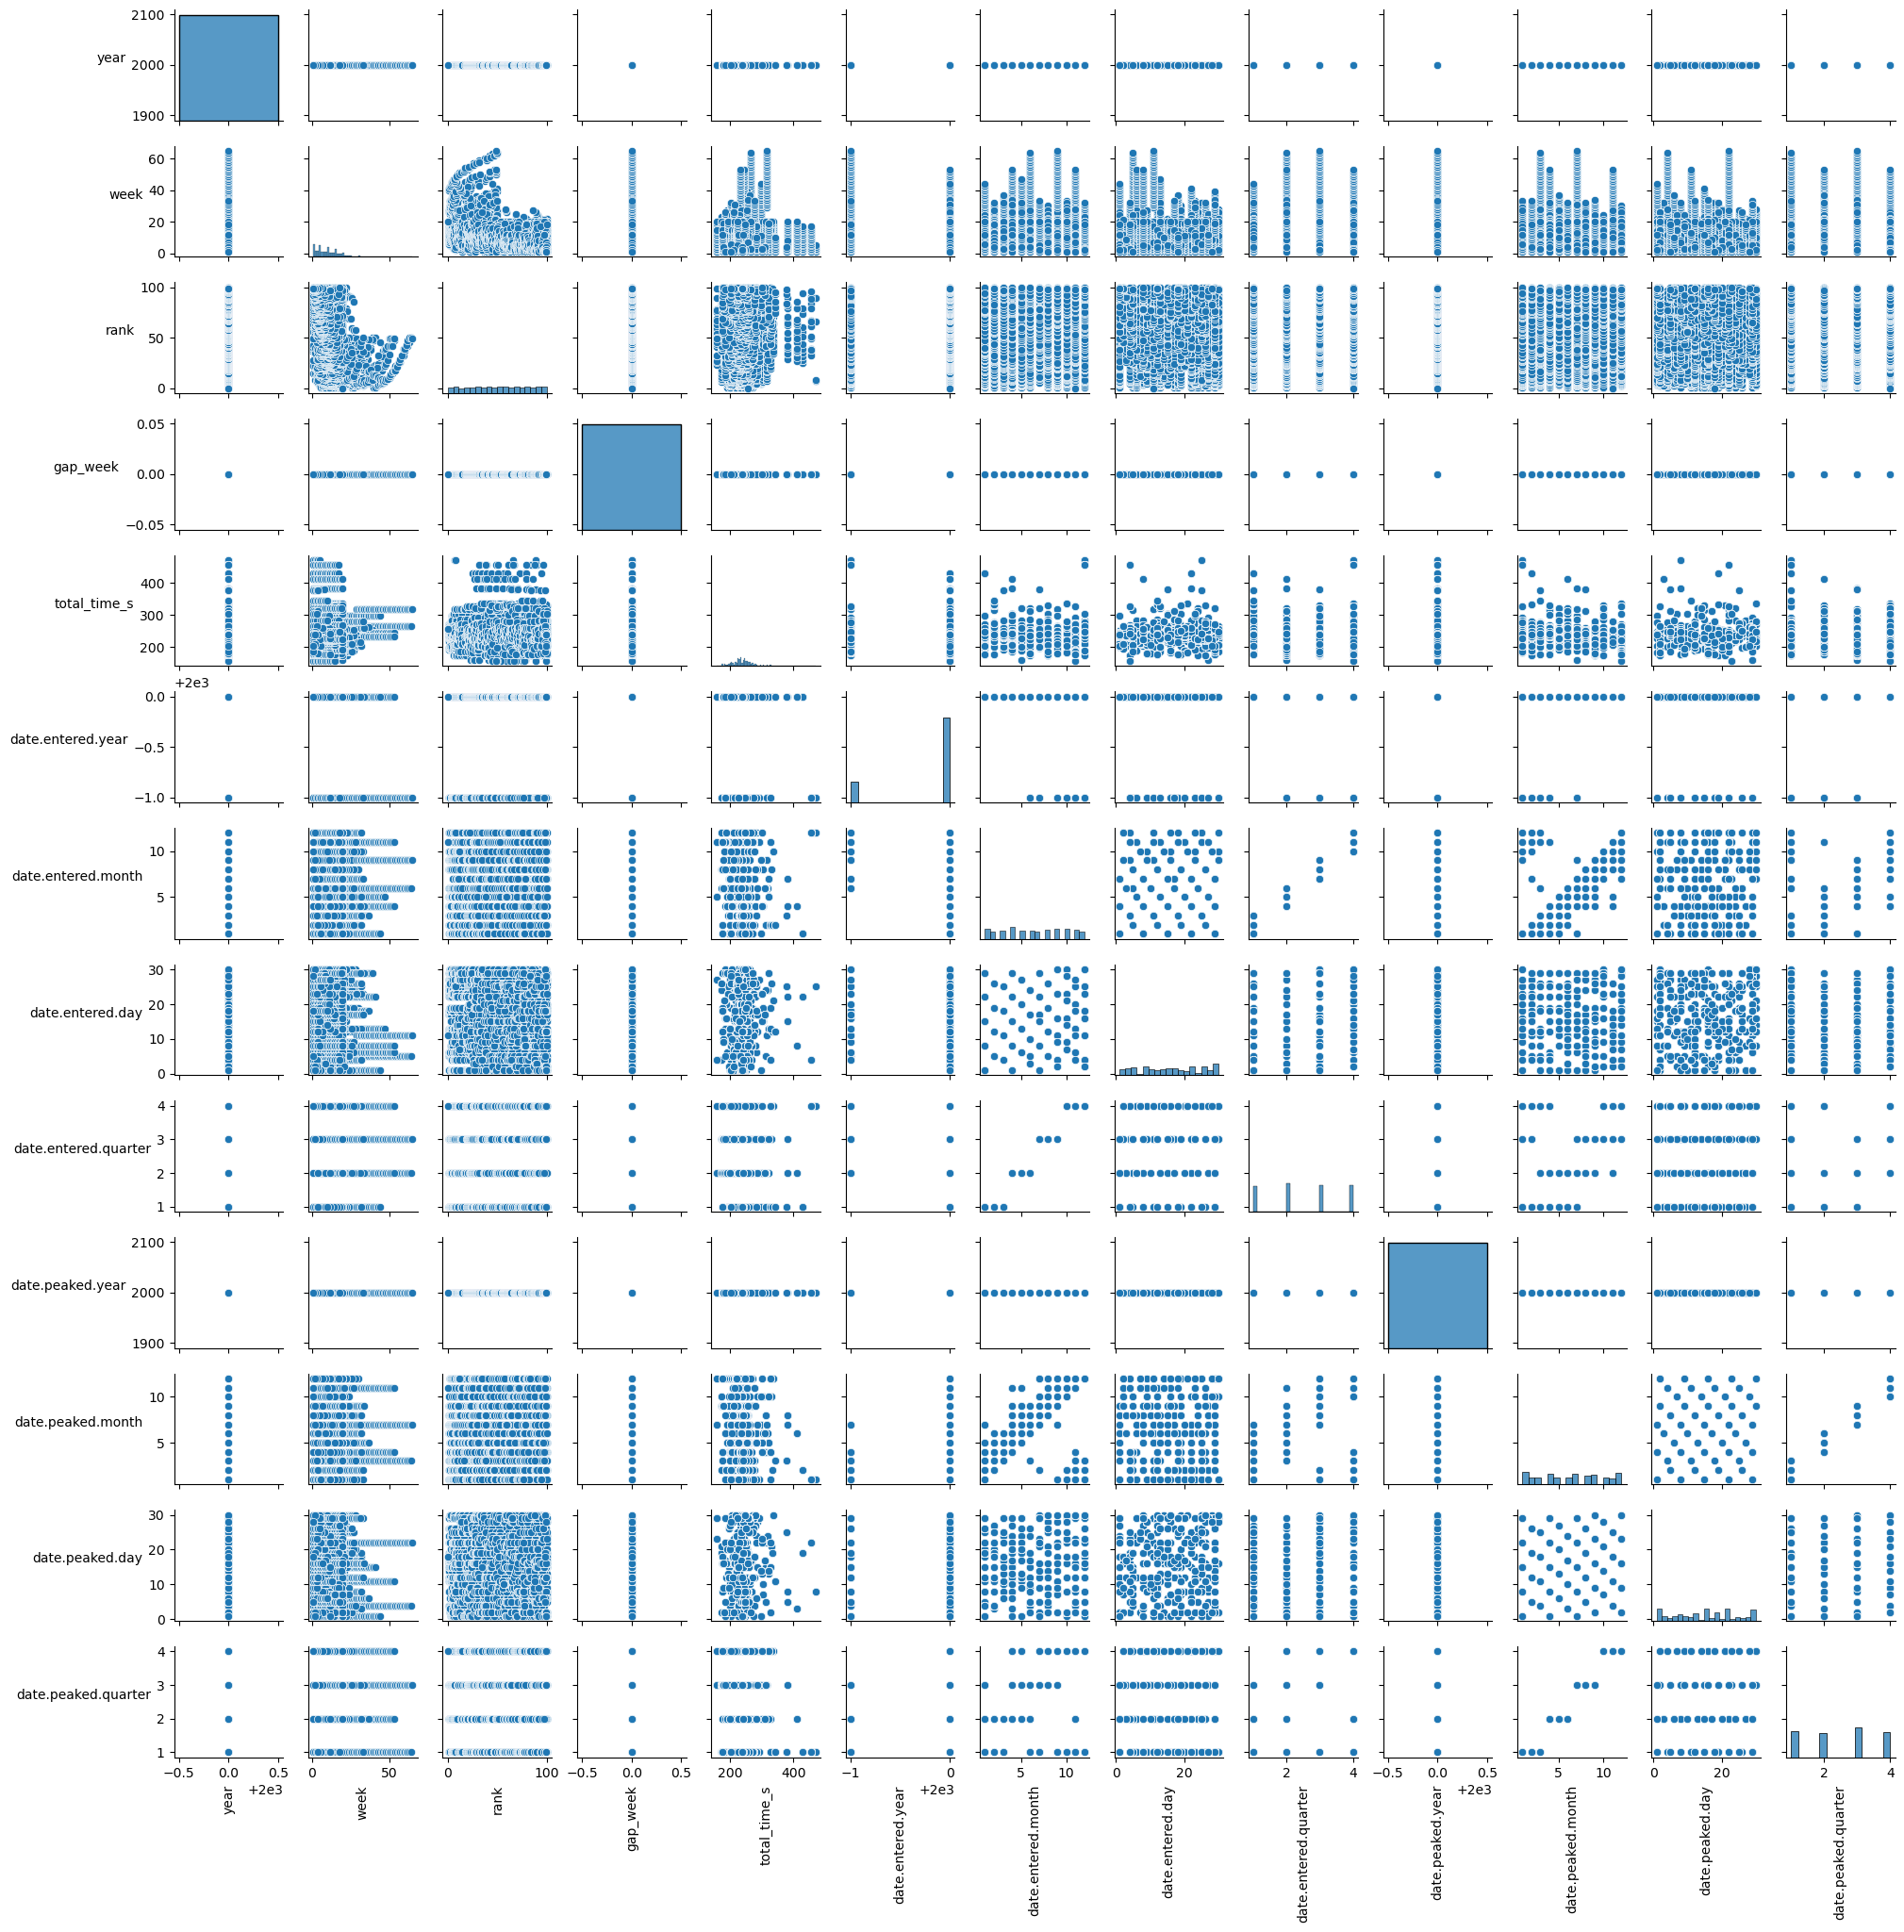

In [53]:
g = sns.pairplot(working_df_mess45, height = 1.5)
# code below sourced from https://stackoverflow.com/questions/60843085/how-to-rotate-labels-in-a-seaborn-pairgrid
for ax in g.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 90)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

# Scaling Data - to follow